## AccelerateAI - Global Bootcamp

#### Tree Based Models

In this notebook we will look at building regression trees using 2 method:
 - CART
 - Cubist

In [57]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.datasets import fetch_california_housing
from cubist import Cubist

import matplotlib.pyplot as plt

In [58]:
# Fetch the california housing dataset
X_raw, Y_raw = fetch_california_housing(return_X_y=True, as_frame=True)

In [59]:
#Feature of house
X_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [60]:
#House price
Y_raw[0:5]

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw, test_size=0.20, random_state=1)

In [62]:
# CART Regression Tree
cart_tree = DecisionTreeRegressor(random_state=0)
cart_tree.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [72]:
# Tree depth
cart_tree.get_depth()

37

In [63]:
text_representation = export_text(cart_tree)
print(text_representation)

|--- feature_0 <= 5.12
|   |--- feature_0 <= 3.13
|   |   |--- feature_5 <= 2.16
|   |   |   |--- feature_6 <= 37.94
|   |   |   |   |--- feature_7 <= -118.24
|   |   |   |   |   |--- feature_6 <= 34.63
|   |   |   |   |   |   |--- feature_5 <= 1.62
|   |   |   |   |   |   |   |--- feature_7 <= -118.31
|   |   |   |   |   |   |   |   |--- feature_2 <= 3.07
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 33.99
|   |   |   |   |   |   |   |   |   |   |--- value: [3.50]
|   |   |   |   |   |   |   |   |   |--- feature_6 >  33.99
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1.67
|   |   |   |   |   |   |   |   |   |   |   |--- value: [4.50]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  1.67
|   |   |   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |--- feature_2 >  3.07
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 34.01
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.89
|   |   |   |   |   |   |   |   

In [64]:
#Calculate the accuray of clasification using test data
cart_train_acc =cart_tree.score(X_train, Y_train)
cart_test_acc = cart_tree.score(X_test, Y_test)

print("CART=> Train:", cart_train_acc.round(3), "Test:", cart_test_acc.round(3) )

CART=> Train: 1.0 Test: 0.63


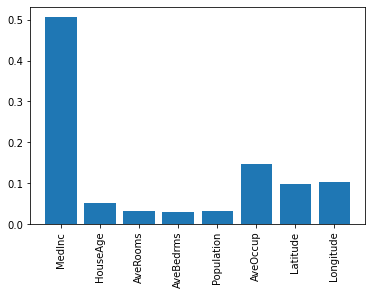

In [65]:
plt.figure(figsize=(6, 4))
plt.bar(np.arange(X.shape[1]), np.squeeze(np.abs(cart_tree.feature_importances_)) )
plt.xticks(np.arange(X.shape[1]), ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                                  'Population', 'AveOccup', 'Latitude', 'Longitude'],
                     rotation = 90) 
None

In [66]:
# Cubist Model Tree
cubist_model = Cubist() # <- model parameters here
cubist_model.fit(X_train, Y_train)

Cubist()

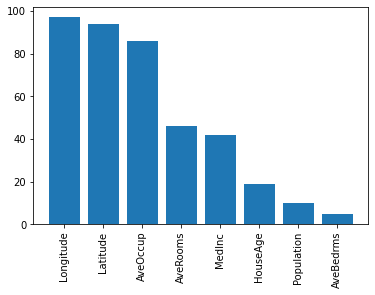

In [67]:
plt.figure(figsize=(6, 4))
importance = cubist_model.feature_importances_
plt.bar(importance.Variable, importance.Conditions)

x_names = ['Longitude','Latitude','AveOccup','AveRooms','MedInc','HouseAge','Population','AveBedrms']
plt.xticks(importance.Variable, x_names, rotation = 90)
None

In [68]:
#Calculate the accuray of clasification using test data
cubist_train_acc =cubist_model.score(X_train, Y_train)
cubist_test_acc = cubist_model.score(X_test, Y_test)

print("Cubist => Train:", cubist_train_acc.round(3), "Test:", cubist_test_acc.round(3) )

Cubist => Train: 0.873 Test: 0.805


In [69]:
cubist_model.rules_ 

,committee,rule,variable,dir,value,category,type,percentile
0,1,1,var6,>,34.620,,continuous,0.465722
1,1,1,var7,>,-120.060,,continuous,0.603137
2,1,1,var5,>,2.794,,continuous,0.513203
3,1,2,var6,>,39.320,,continuous,0.033612
4,1,2,var7,>,-122.400,,continuous,0.922420
...,...,...,...,...,...,...,...,...
786,1,150,var7,<=,-122.310,,continuous,0.094961
787,1,150,var1,>,47.000,,continuous,0.084726
788,1,150,var0,<=,7.814,,continuous,0.962149
789,1,150,var6,<=,37.920,,continuous,0.826126
